# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [1 балл] Какое среднее качество у вин в выборке?
2. [1 балл] У какого числа вин показатель citric acid равен нулю?
3. [1 балл] Какова доля вин с максимальным качеством от общего количества вин в выборке? 
4. [2 балла] Правда ли, что в среднем, чем больше показатель переменной кислотности (volatile acidity), тем ниже оценивается качество вина? Проверьте это, используя метод `groupby`
5. [1 балл] Визуализация - Постройте гистограммы всех переменных датасета при помощи одной команды. Распределения каких переменных больше всего похожи на нормальное? 
6. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций Спирмана\* для всего датасета. Какой фактор наиболее положительно влияет на качество вина, а какой наиболее отрицательно? Выпишите соответствующие этим переменным значения корреляции Спирмана
7. [3 балла] Визуализация - по аналогии с семинарским занятием, постройте на одном графике оценки распределений (KDE) показателя volatile acidity для каждого из возможных значений качества вина. Для этого используйте `.plot`, задав в качестве параметра kind значение 'kde'. Не забудьте добавить подписи к графикам. Чтобы график лучше читался, первой строкой можно задать размер при помощи `plt.figure` равный (15, 10), а последней строкой - ограничить отрисовку графика слева по значению 0 при помощи `plt.xlim`. Подсказка - для построения этого графика не обязательно 6 раз писать одну и ту же строчку, можно доверить подстановку текущего значения `quality` циклу `for`. 

\* Если интересно почитать, почему нужно использовать именно корреляцию Спирмана - https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('pilipenko_winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


### Комментарий  к решению
Всё верно, 1 балл

In [3]:
print('Среднее качество винчика',data.quality.mean())

Среднее качество винчика 5.6360225140712945


### Комментарий  к решению
Тоже всё верно, 1 балл, и круто, что освоили циклы, но можно было сделать попроще - посчитать длину среза датасета, в котором интересующий нас показатель равен нулю :) 

In [4]:
len(data[data['citric acid']==0])

132

In [5]:
count = 0
peremennaya = 0
while len(data['citric acid'])>count:
    if data['citric acid'][count] == 0:
        peremennaya+=1
    count+=1
print("Число вин, где показатель citric acid равен нулю :",peremennaya)

Число вин, где показатель citric acid равен нулю : 132


### Комментарий  к решению
Всё верно, 1 балл, здорово, что воспользовались методом `.count()`. Как вариант - можно было сделать только через длину среза, без выбора самого столбца

In [6]:
len(data[data['quality']>=7])/len(data)

0.1357098186366479

In [7]:
q = data.loc[:,['quality']][data['quality'] >= 7].count()
z = float(q/len(data['quality']))
print('Доля вин с максимальным качеством от общего количества вин в выборке:',z * 100,'%')

Доля вин с максимальным качеством от общего количества вин в выборке: 13.570981863664791 %


### Комментарий  к решению
Тут всё-таки 0, так как `groupby` было бы неплохо использовать. И смысл был в том, чтобы проверить, действительно ли средняя кислотность ведёт к более низкой оценке качества - в groupby это хорошо видно. Но if-else  конструкция хороша :3

In [8]:
data.groupby('quality')['volatile acidity'].mean()

quality
3    0.884500
4    0.693962
5    0.577041
6    0.497484
7    0.403920
8    0.423333
Name: volatile acidity, dtype: float64

In [9]:
a = int(data.loc[:,['volatile acidity']] .sum())
b = int(data.loc[:,['quality']] .sum())
c = a/len(data['volatile acidity'])
d = b/len(data['quality'])
print("Средний показатель переменной кислотности:", c)
print("Средний показатель качества вина:", d)
if c > 0.5 and d > 5:
    print("Ложь")
else:
    print("Правда")


Средний показатель переменной кислотности: 0.5272045028142589
Средний показатель качества вина: 5.6360225140712945
Ложь


### Комментарий  к решению
Всё верно, кстати, можно было и не создавать переменной df_numeric, а сразу использовать hist и corr, так как питон автоматически отберет только те признаки, по которым посчитать гистограммы и корреляции получится

Только не выписали, какие распределения похожи на нормальные ;)

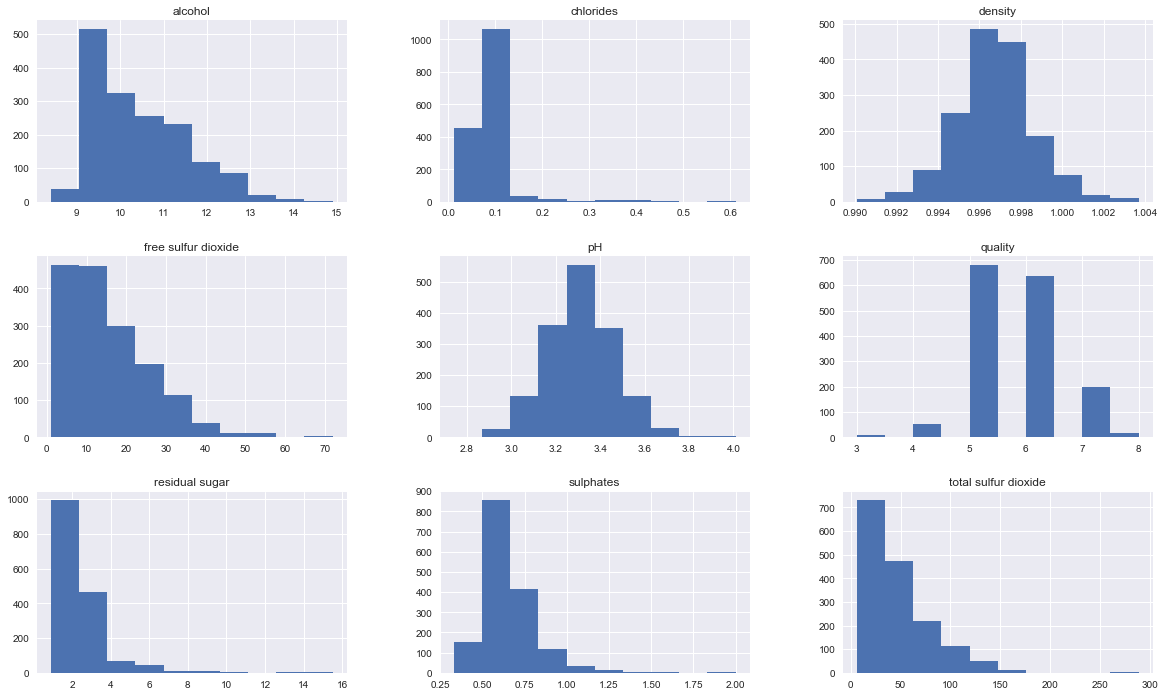

In [12]:
df_numeric.hist(figsize=(20, 12));

### Комментарий  к решению
Как сказано в задании, нужно было использовать корреляцияю Спирмана, а не кендалла, и вы не выписали факторы, которые сильнее всего влияют на качество вина - так переменная кислотность сильнее всего отрицательно скоррелирована с качеством (то есть чем кислее вино, тем ниже оценивают его качество), а вот содержание алкоголя - наиболее благотворно влияет на оценку.

Но тем не менее визуализация есть, так что 1 балл зачтён :)

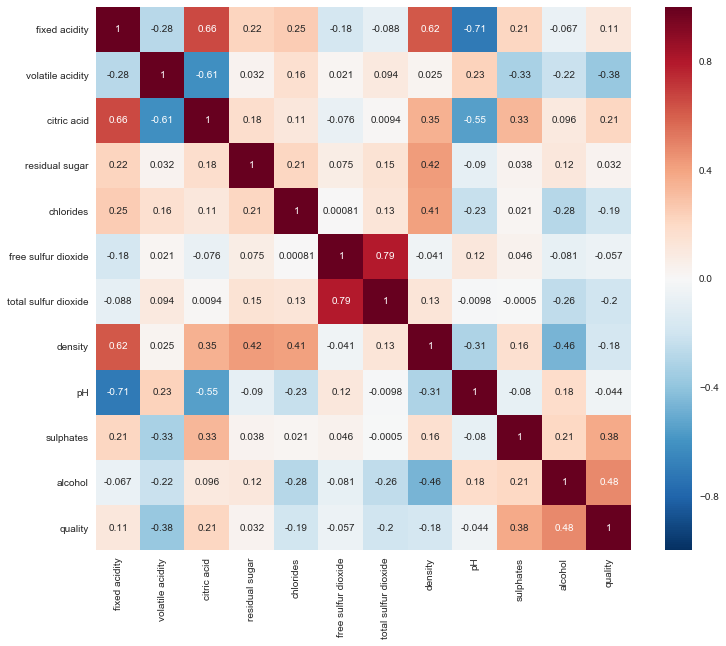

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr('spearman'), annot=True);

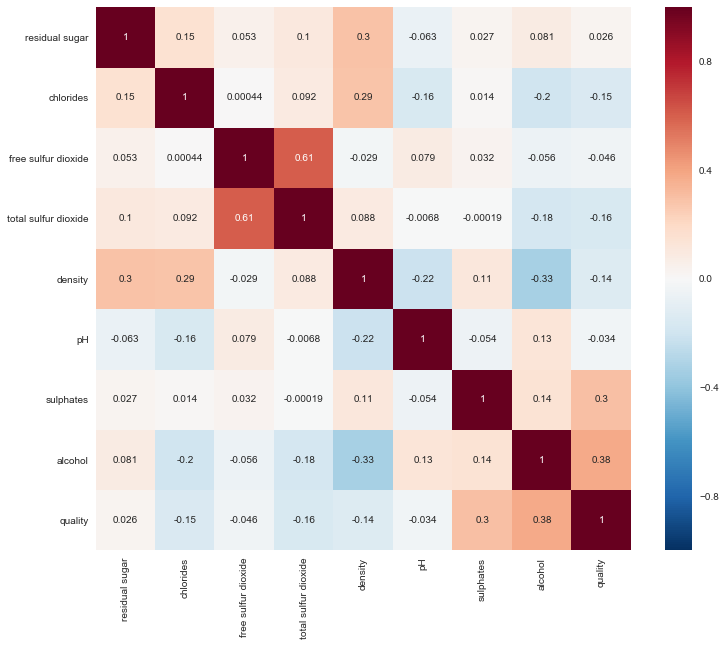

In [11]:
df_numeric = data.drop(['fixed acidity', 'volatile acidity', 'citric acid'], axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr('kendall'), annot=True);

### Комментарий  к решению
Подозреваю, это задание получилось "со звездочкой", имелось в виду, что у нас есть 6 возможных вариантов для качества вина, и для каждого их них нужно было сделать срез датасета (чтобы взять только строчки, у которых качество вина равно текущему) и построить для него KDE распределение :) На этом графике хорошо видно, что распределение кислотности для разного качества вина кардинально отличается, а значит, для будущих моделей этот показатель точно будет очень важен 

Но у вас визуализация тоже достойная, есть и гистограмма, и её KDE, так что 2 балла

In [15]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

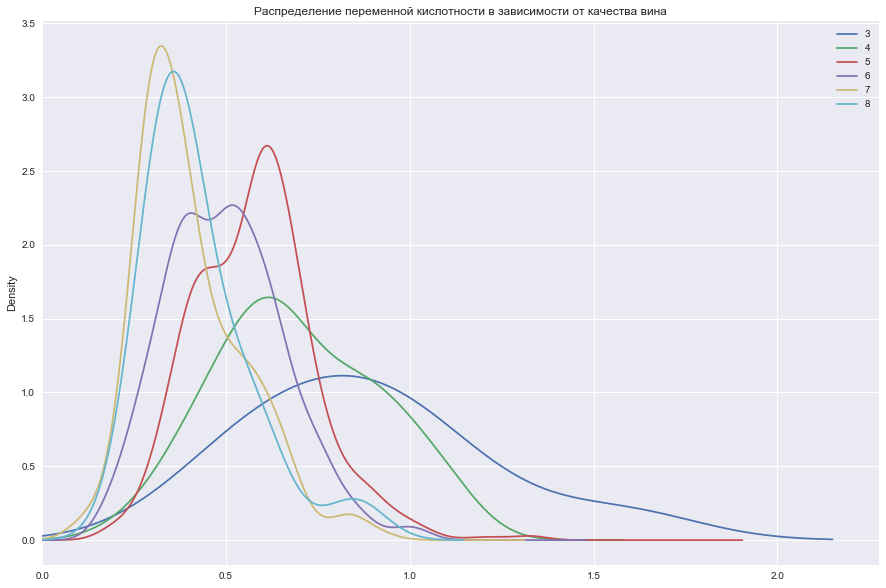

In [14]:
plt.figure(figsize=(15, 10))

for i in range(3, 9):
    data['volatile acidity'][data.quality==i].plot(kind='kde', label=str(i))
    
plt.legend()
plt.title("Распределение переменной кислотности в зависимости от качества вина")
plt.xlim(0);

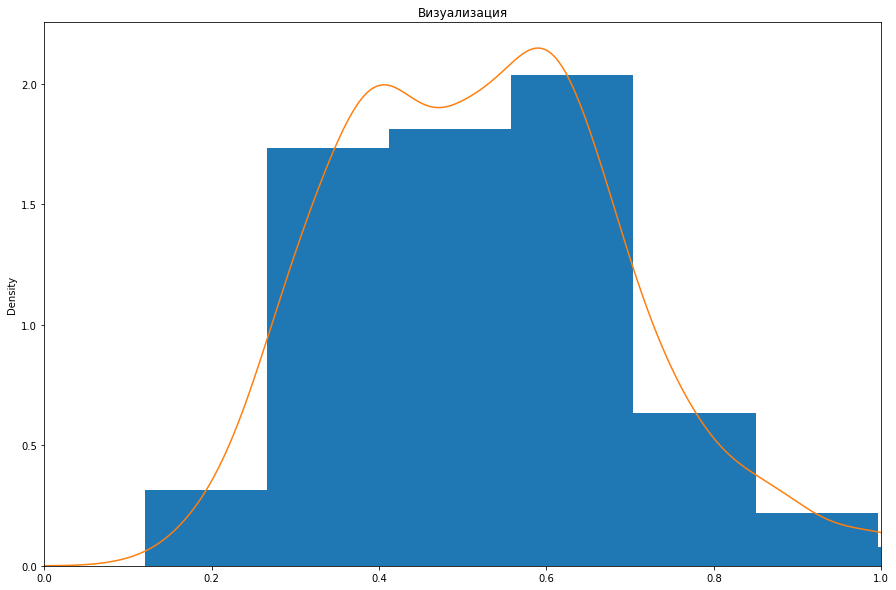

In [76]:
plt.figure(figsize=(15, 10))
data['volatile acidity'].hist(bins=10, normed=True)
data['volatile acidity'].plot(kind='kde')

plt.xlim(0, 1)
plt.title("Визуализация");

## Итого - 7 баллов